In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv(r'C:\Users\ngrin\Downloads\movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [5]:
# Check if there's missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# dta types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# change data type of columns
df['budget'] = df['budget'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [8]:
df['budget'] = df['budget'].fillna(0)
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         0.0   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0.0   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [9]:
df['gross'] = df['gross'].fillna(0)
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         0.0   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0.0   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          0.0                        NaN     90.0  
7664          0.0  Cactus Blue Entertainment     90.0  
7665          0.0           Embi Productions      NaN  
7666          0.0                        NaN    120.0  
7667          0.0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [10]:
# change data type of columns
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [11]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [12]:
# change the date format
df['released'] = df['released'].dt.strftime('%Y-%-m-%-d')
df

AttributeError: Can only use .dt accessor with datetimelike values

In [13]:
# change the date format
df['released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format = '%B %d, %Y')
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

       released  score      votes         director                   writer  \
0    1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1    1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2    1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3    1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4    1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   
...         ...    ...        ...              ...                      ...   
7663 2020-10-23    3.1       18.0    Joseph Ebanks            Joseph Ebanks   
7664 2020-02-07    4.7       36.0     Dusty Dukatz              Lisa Huston   
7665 2020-04-27    5.7       29.0     Nkanya Nkwai             Lynno Lovert   
7666 2020-10-01    NaN        NaN    James Randall            James Randall   
7667 2020-08-19    5.7        7.0     Pereko Mosia             Pereko Mosia   

                  star         country    budget      gross  \
0       Jack Nicholson  United Kingdom  19000000   46998772   
1       Brooke Shields   United States   4500000   58853106   
2          Mark Hamill   United States  18000000  538375067   
3          Robert Hays   United States   3500000   83453539   
4          Chevy Chase   United States   6000000   39846344   
...                ...             ...       ...        ...   
7663      Shannon Bond   United States      7000          0   
7664  Michael Saquella   United States         0          0   
7665      Onyama Laura   United States     58750          0   
7666     Christina Roz   United States     15000          0   
7667  Siyabonga Mabaso    South Africa         0          0   

                        company  runtime  
0                  Warner Bros.    146.0  
1             Columbia Pictures    104.0  
2                     Lucasfilm    124.0  
3            Paramount Pictures     88.0  
4                Orion Pictures     98.0  
...                         ...      ...  
7663                        NaN     90.0  
7664  Cactus Blue Entertainment     90.0  
7665           Embi Productions      NaN  
7666                        NaN    120.0  
7667                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [14]:
# create correct year column
df['yearcorrect'] = df['released'].astype(str).str[:4]
df

SyntaxError: invalid syntax (2959976271.py, line 2)

In [15]:
# create correct year column
df['yearcorrect'] = df['released'].astype(str).str[:4]
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

       released  score      votes         director                   writer  \
0    1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1    1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2    1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3    1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4    1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   
...         ...    ...        ...              ...                      ...   
7663 2020-10-23    3.1       18.0    Joseph Ebanks            Joseph Ebanks   
7664 2020-02-07    4.7       36.0     Dusty Dukatz              Lisa Huston   
7665 2020-04-27    5.7       29.0     Nkanya Nkwai             Lynno Lovert   
7666 2020-10-01    NaN        NaN    James Randall            James Randall   
7667 2020-08-19    5.7        7.0     Pereko Mosia             Pereko Mosia   

                  star         country    budget      gross  \
0       Jack Nicholson  United Kingdom  19000000   46998772   
1       Brooke Shields   United States   4500000   58853106   
2          Mark Hamill   United States  18000000  538375067   
3          Robert Hays   United States   3500000   83453539   
4          Chevy Chase   United States   6000000   39846344   
...                ...             ...       ...        ...   
7663      Shannon Bond   United States      7000          0   
7664  Michael Saquella   United States         0          0   
7665      Onyama Laura   United States     58750          0   
7666     Christina Roz   United States     15000          0   
7667  Siyabonga Mabaso    South Africa         0          0   

                        company  runtime yearcorrect  
0                  Warner Bros.    146.0        1980  
1             Columbia Pictures    104.0        1980  
2                     Lucasfilm    124.0        1980  
3            Paramount Pictures     88.0        1980  
4                Orion Pictures     98.0        1980  
...                         ...      ...         ...  
7663                        NaN     90.0        2020  
7664  Cactus Blue Entertainment     90.0        2020  
7665           Embi Productions      NaN        2020  
7666                        NaN    120.0        2020  
7667                PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [24]:
# order data by gross desc
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [19]:
# display more rows
pd.set_option('display.max_rows', None)

In [22]:
# drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

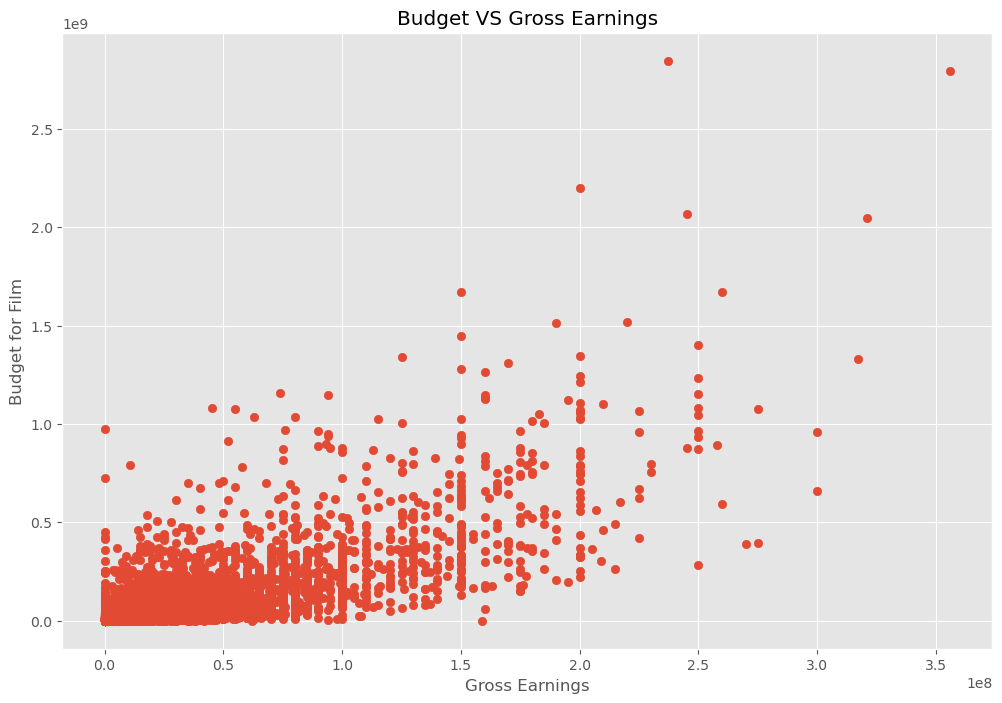

In [26]:
# scatterplot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [25]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

       released  score      votes       director              writer  \
5445 2009-12-18    7.8  1100000.0  James Cameron       James Cameron   
7445 2019-04-26    8.4   903000.0  Anthony Russo  Christopher Markus   
3045 1997-12-19    7.8  1100000.0  James Cameron       James Cameron   
6663 2015-12-18    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244 2018-04-27    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime yearcorrect  
5445  Twentieth Century Fox    162.0        2009  
7445         Marvel Studios    181.0        2019  
3045  Twentieth Century Fox    194.0        1997  
6663              Lucasfilm    138.0        2015  
7244         Marvel Studios    149.0        2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

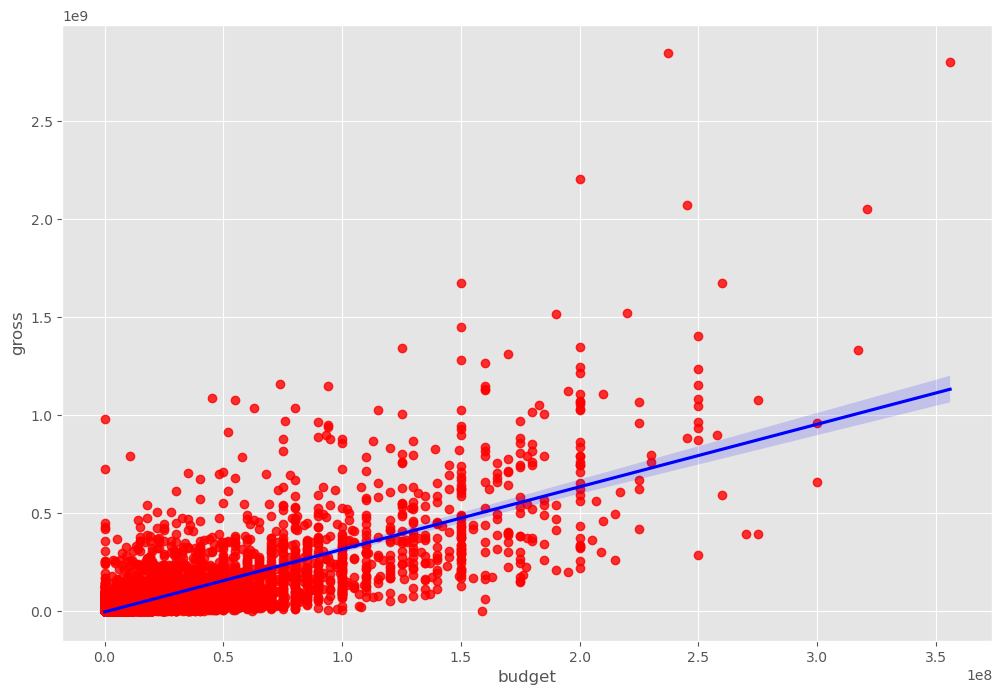

In [29]:
# plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [34]:
# lets start looking at correlation
# methods = pearson, kendall, spearman
df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

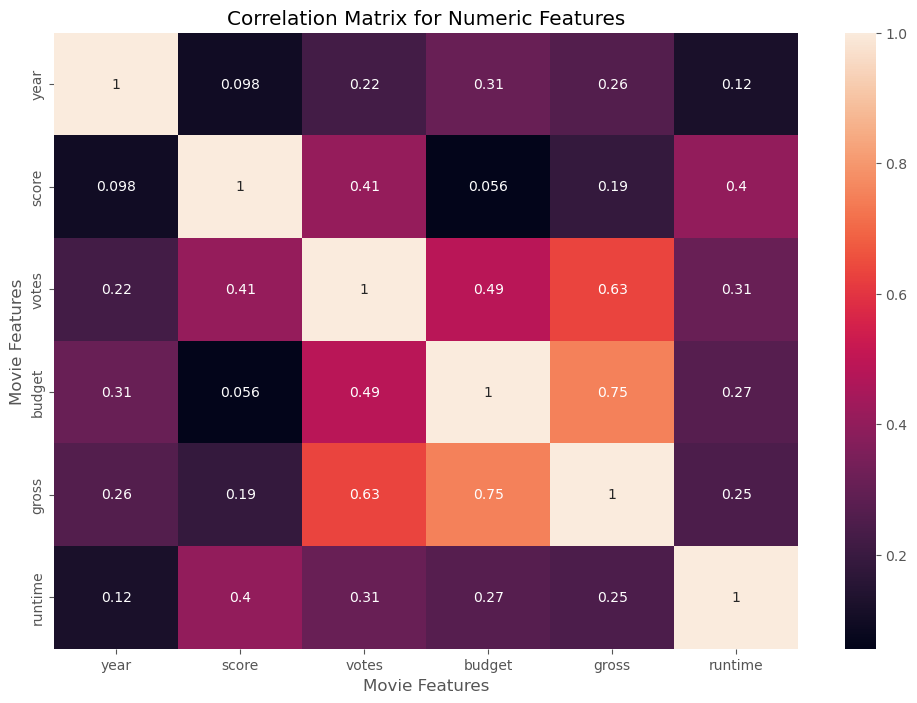

In [37]:
# high correlation between budget and gross
# i was right
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [40]:
# looks at company
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year   released  score      votes  director  \
5445   533       5      0  2009 2009-12-18    7.8  1100000.0      1155   
7445   535       5      0  2019 2019-04-26    8.4   903000.0       162   
3045  6896       5      6  1997 1997-12-19    7.8  1100000.0      1155   
6663  5144       5      0  2015 2015-12-18    7.8   876000.0      1125   
7244   536       5      0  2018 2018-04-27    8.4   897000.0       162   
7480  6194       4      2  2019 2019-07-19    6.9   222000.0      1455   
6653  2969       5      0  2015 2015-06-12    7.0   593000.0       517   
6043  5502       5      0  2012 2012-05-04    8.0  1300000.0      1517   
6646  2145       5      0  2015 2015-04-03    7.1   370000.0      1189   
7494  2131       4      2  2019 2019-11-22    6.8   148000.0       432   
6644   534       5      0  2015 2015-05-01    7.3   777000.0      1517   
7247   791       5      0  2018 2018-02-16    7.3   661000.0      2457   
5845  2407       5      1  2011 2011-07-15    8.1   790000.0       679   
7075  5145       5      0  2017 2017-12-15    7.0   581000.0      2282   
7271  2970       5      0  2018 2018-06-22    6.2   277000.0      1121   
6262  2130       4      2  2013 2013-11-27    7.4   585000.0       432   
7072   657       4      7  2017 2017-03-17    7.1   283000.0       250   
7281  2760       4      2  2018 2018-06-15    7.6   263000.0       303   
7055  5833       5      0  2017 2017-04-14    6.6   214000.0       835   
6244  2823       5      0  2013 2013-05-03    7.1   779000.0      2543   
6688  3622       4      2  2015 2015-07-10    6.4   218000.0      1639   
6846  1056       5      0  2016 2016-05-06    7.8   694000.0       162   
7250   474       5      0  2018 2018-12-21    6.9   404000.0      1189   
4245  6221       5      0  2003 2003-12-17    8.9  1700000.0      2193   
7458  5084       5      0  2019 2019-07-02    7.5   359000.0      1463   
7456  1061       5      0  2019 2019-03-08    6.8   478000.0       147   
5878  6968       5      0  2011 2011-06-29    6.2   390000.0      1886   
6059  4951       5      0  2012 2012-11-09    7.7   642000.0      2476   
6494  6967       5      0  2014 2014-06-27    5.6   302000.0      1886   
2448  6194       1      2  1994 1994-06-24    8.5   970000.0      2415   
6047  5726       5      0  2012 2012-07-20    8.4  1600000.0       483   
7463  5141       5      0  2019 2019-12-20    6.5   394000.0      1125   
7450  2930       6      5  2019 2019-10-04    8.4  1000000.0      2767   
7488  6949       1      2  2019 2019-06-21    7.7   217000.0      1509   
5685  6948       1      2  2010 2010-06-18    8.2   776000.0      1678   
4852  4258       5      0  2006 2006-07-07    7.3   668000.0       996   
6869  4616       5      0  2016 2016-12-16    7.8   572000.0       912   
7481   290       4      1  2019 2019-05-24    6.9   239000.0      1031   
5860  4261       5      0  2011 2011-05-20    6.6   492000.0      2341   
7140  1552       4      2  2017 2017-06-30    6.3   119000.0      1639   
2245  2967       5      0  1993 1993-06-11    8.1   894000.0      2660   
6908  1978       4      2  2016 2016-06-17    7.3   250000.0       124   
3451  5138       4      0  1999 1999-05-19    6.5   748000.0       963   
5667   300       4      1  2010 2010-03-05    6.4   392000.0      2745   
6863  7504       4      2  2016 2016-03-04    8.0   450000.0       362   
6045  6001       5      1  2012 2012-12-14    7.8   773000.0      2193   
3843  2412       4      1  2001 2001-11-16    7.6   685000.0       435   
5243  5725       5      0  2008 2008-07-18    9.0  2400000.0       483   
5652  2406       5      1  2010 2010-11-19    7.7   495000.0       679   
6311  1551       4      2  2013 2013-07-03    7.3   377000.0      2237   
6905  6108       4      1  2016 2016-04-15    7.4   264000.0      1455   
7051  2956       5      0  2017 2017-12-20    6.9   336000.0      1143   
6455  6002       5      1  2014 2014-12-17    7.4   487000.0      2193   
5060  4260

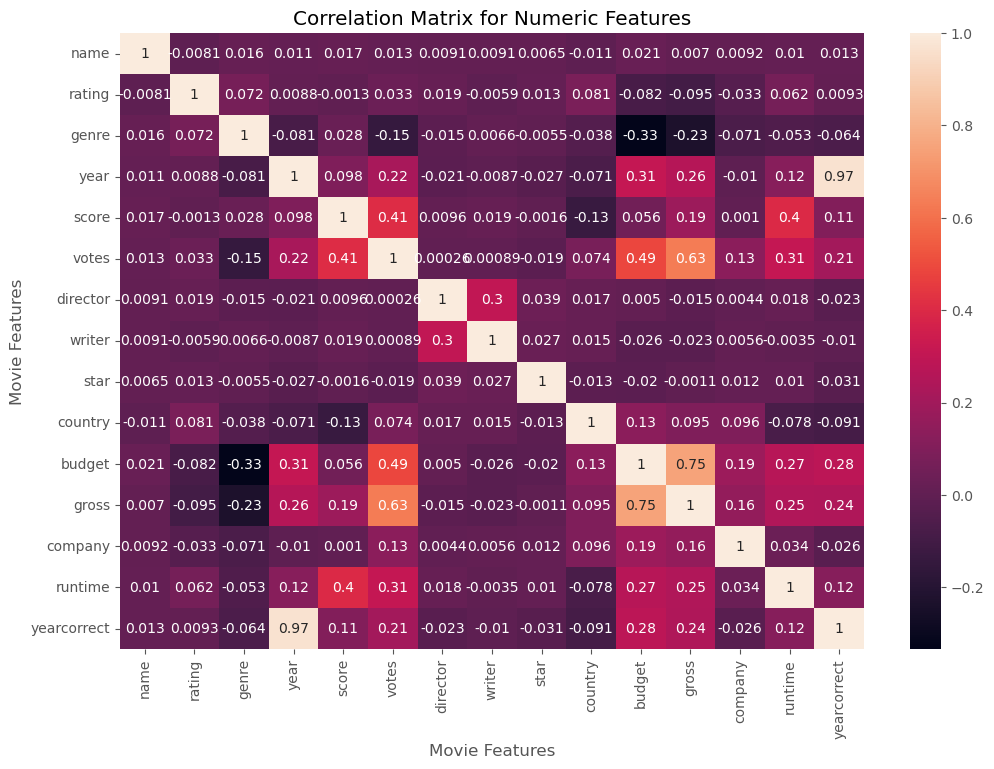

In [41]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [42]:
df_numerized.corr()

name    rating     genre      year     score     votes  \
name         1.000000 -0.008069  0.016355  0.011453  0.017097  0.013088   
rating      -0.008069  1.000000  0.072423  0.008779 -0.001314  0.033225   
genre        0.016355  0.072423  1.000000 -0.081261  0.027965 -0.145307   
year         0.011453  0.008779 -0.081261  1.000000  0.097995  0.222945   
score        0.017097 -0.001314  0.027965  0.097995  1.000000  0.409182   
votes        0.013088  0.033225 -0.145307  0.222945  0.409182  1.000000   
director     0.009079  0.019483 -0.015258 -0.020795  0.009559  0.000260   
writer       0.009081 -0.005921  0.006567 -0.008656  0.019416  0.000892   
star         0.006472  0.013405 -0.005477 -0.027242 -0.001609 -0.019282   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.133348  0.073625   
budget       0.020548 -0.081939 -0.334021  0.309212  0.055665  0.486862   
gross        0.006989 -0.095450 -0.234297  0.261900  0.186392  0.632834   
company      0.009211 -0.032943 -0.071067 -0.010431  0.001030  0.133204   
runtime      0.010392  0.062145 -0.052711  0.120811  0.399451  0.309212   
yearcorrect  0.012835  0.009280 -0.063573  0.967486  0.107219  0.206475   

             director    writer      star   country    budget     gross  \
name         0.009079  0.009081  0.006472 -0.010737  0.020548  0.006989   
rating       0.019483 -0.005921  0.013405  0.081244 -0.081939 -0.095450   
genre       -0.015258  0.006567 -0.005477 -0.037615 -0.334021 -0.234297   
year        -0.020795 -0.008656 -0.027242 -0.070938  0.309212  0.261900   
score        0.009559  0.019416 -0.001609 -0.133348  0.055665  0.186392   
votes        0.000260  0.000892 -0.019282  0.073625  0.486862  0.632834   
director     1.000000  0.299067  0.039234  0.017490  0.004976 -0.014916   
writer       0.299067  1.000000  0.027245  0.015343 -0.025911 -0.022997   
star         0.039234  0.027245  1.000000 -0.012998 -0.019952 -0.001129   
country      0.017490  0.015343 -0.012998  1.000000  0.131720  0.095325   
budget       0.004976 -0.025911 -0.019952  0.131720  1.000000  0.750157   
gross       -0.014916 -0.022997 -0.001129  0.095325  0.750157  1.000000   
company      0.004404  0.005646  0.012442  0.095548  0.186474  0.156745   
runtime      0.017624 -0.003511  0.010174 -0.078412  0.269510  0.245235   
yearcorrect -0.022579 -0.010063 -0.031166 -0.090962  0.284783  0.243478   

              company   runtime  yearcorrect  
name         0.009211  0.010392     0.012835  
rating      -0.032943  0.062145     0.009280  
genre       -0.071067 -0.052711    -0.063573  
year        -0.010431  0.120811     0.967486  
score        0.001030  0.399451     0.107219  
votes        0.133204  0.309212     0.206475  
director     0.004404  0.017624    -0.022579  
writer       0.005646 -0.003511    -0.010063  
star         0.012442  0.010174    -0.031166  
country      0.095548 -0.078412    -0.090962  
budget       0.186474  0.269510     0.284783  
gross        0.156745  0.245235     0.243478  
company      1.000000  0.034402    -0.026492  
runtime      0.034402  1.000000     0.115317  
yearcorrect -0.026492  0.115317     1.000000

In [43]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.012835
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
             budget        -0.081939
             gross         -0.095450
 

In [46]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
             votes         -0.145307
votes        genre         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
country      yearcorrect   -0.090962
yearcorrect  country       -0.090962
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
company      genre         -0.071067
genre        company       -0.071067
year         country       -0.070938
country      year          -0.070938
yearcorrect  genre         -0.063573
genre        yearcorrect   -0.063573
runtime      genre         -0.052711
genre        runtime       -0.052711
             country       -0.037615
c

In [48]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.632834
gross        votes          0.632834
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  year           0.967486
year         yearcorrect    0.967486
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings
# company has low correlation
# i was wrong
